<a href="https://colab.research.google.com/github/Ashu156/JLab/blob/main/JL_Body_weight_across_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import io

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Weights for plotting.csv']))
print(df)

Saving Weights for plotting.csv to Weights for plotting.csv
         XFN1        XFN2        XFN3        XFN4
0  100.000000  100.000000  100.000000  100.000000
1   96.857671   96.183206   95.866142   97.064220
2   94.085028   93.129771   94.685039   95.229358
3   92.421442   92.748092   93.897638   94.495413
4   92.236599   91.984733   92.519685   93.761468


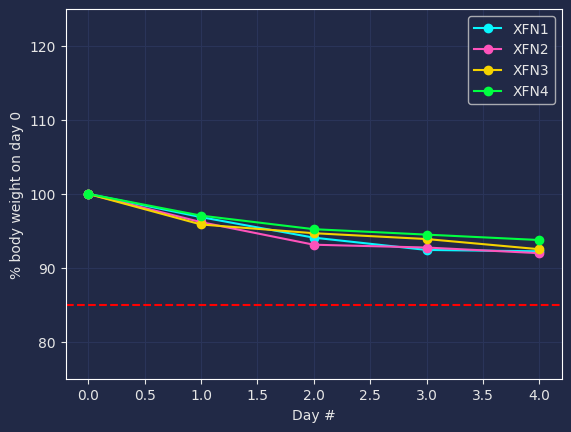

In [4]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]
fig, ax = plt.subplots()
# df.plot(x = 'Food fed', y = ['XFN1', 'XFN2', 'XFN3',  'XFN4'], marker='o', color=colors, ax=ax)
df.plot(marker='o', color=colors, ax=ax)
ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([75, 125])
ax.set_xlabel('Day #')
ax.set_ylabel('% body weight on day 0'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(85.0, linestyle='--', color = 'red')

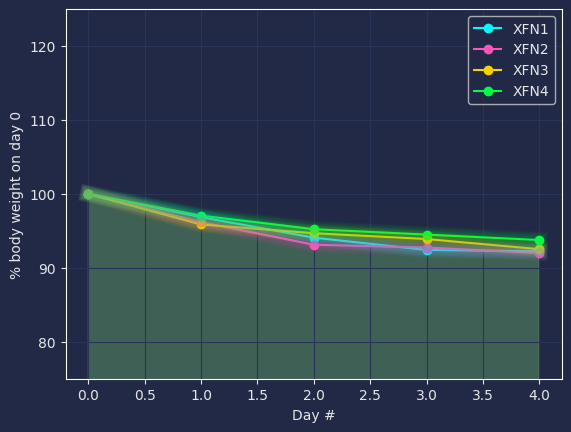

In [5]:
fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)
# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)
# Color the areas below the lines:
for column, color in zip(df, colors):
    ax.fill_between(x=df.index,
                    y1=df[column].values,
                    y2=[0] * len(df),
                    color=color,
                    alpha=0.1)
    
ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([75, 125])
ax.set_xlabel('Day #')
ax.set_ylabel('% body weight on day 0')

ax.axhline(2.0, linestyle='--', color = 'red')